In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
ICRISAT_df =  pd.read_csv("D:/Self shimts/real shit/Raja Vignesh - agri crop yield/rajavignesh.csv")
ICRISAT_df.head(5)

Dist Code  Year  State Code    State Name Dist Name  RICE AREA (1000 ha)  \
0          1  1966          14  Chhattisgarh      Durg                548.0   
1          1  1967          14  Chhattisgarh      Durg                547.0   
2          1  1968          14  Chhattisgarh      Durg                556.3   
3          1  1969          14  Chhattisgarh      Durg                563.4   
4          1  1970          14  Chhattisgarh      Durg                571.6   

   RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  WHEAT AREA (1000 ha)  \
0                        185.0                  337.59                  44.0   
1                        409.0                  747.71                  50.0   
2                        468.0                  841.27                  53.7   
3                        400.8                  711.40                  49.4   
4                        473.6                  828.55                  44.2   

   WHEAT PRODUCTION (1000 tons)  ...  SUGARCANE YIELD (Kg per ha)  \
0                          20.0  ...                      1777.78   
1                          26.0  ...                      1500.00   
2                          30.0  ...                      1000.00   
3                          26.5  ...                      1900.00   
4                          29.0  ...                      2000.00   

   COTTON AREA (1000 ha)  COTTON PRODUCTION (1000 tons)  \
0                    0.0                            0.0   
1                    0.0                            0.0   
2                    0.0                            0.0   
3                    0.0                            0.0   
4                    0.0                            0.0   

   COTTON YIELD (Kg per ha)  FRUITS AREA (1000 ha)  VEGETABLES AREA (1000 ha)  \
0                       0.0                   5.95                       6.64   
1                       0.0                   5.77                       7.24   
2                       0.0                   5.41                       7.40   
3                       0.0                   5.52                       7.16   
4                       0.0                   5.45                       7.19   

   FRUITS AND VEGETABLES AREA (1000 ha)  POTATOES AREA (1000 ha)  \
0                                 12.59                     0.01   
1                                 13.02                     0.01   
2                                 12.81                     0.10   
3                                 12.69                     0.01   
4                                 12.64                     0.02   

   ONION AREA (1000 ha)  FODDER AREA (1000 ha)  
0                  0.60                   0.47  
1                  0.56                   1.23  
2                  0.58                   1.02  
3                  0.56                   0.84  
4                  0.52                   0.42  

[5 rows x 80 columns]

In [2]:
ICRISAT_df.isna().sum()

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [2]:
ICRISAT_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5196 entries, 0 to 5195
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    5196 non-null   int64  
 1   Year                                         5196 non-null   int64  
 2   State Code                                   5196 non-null   int64  
 3   State Name                                   5196 non-null   object 
 4   Dist Name                                    5196 non-null   object 
 5   RICE AREA (1000 ha)                          5196 non-null   float64
 6   RICE PRODUCTION (1000 tons)                  5196 non-null   float64
 7   RICE YIELD (Kg per ha)                       5196 non-null   float64
 8   WHEAT AREA (1000 ha)                         5196 non-null   float64
 9   WHEAT PRODUCTION (1000 tons)                 5196 non-null   float64
 10  

In [3]:
ICRISAT_df.describe()

Dist Code         Year   State Code  RICE AREA (1000 ha)  \
count  5196.000000  5196.000000  5196.000000          5196.000000   
mean     50.465743  1991.482102     7.660508           127.344794   
std      28.853528    15.001619     4.974722           164.541053   
min       1.000000  1966.000000     1.000000             0.000000   
25%      25.000000  1978.000000     5.000000            15.900000   
50%      50.000000  1991.000000     6.000000            68.875000   
75%      75.000000  2004.000000    11.000000           159.125000   
max     100.000000  2017.000000    20.000000          1034.990000   

       RICE PRODUCTION (1000 tons)  RICE YIELD (Kg per ha)  \
count                  5196.000000             5196.000000   
mean                    238.815899             1655.538566   
std                     326.567213             1051.661907   
min                       0.000000                0.000000   
25%                      14.000000              743.417500   
50%                     108.090000             1486.435000   
75%                     330.247500             2405.387500   
max                    2432.480000             5653.830000   

       WHEAT AREA (1000 ha)  WHEAT PRODUCTION (1000 tons)  \
count           5196.000000                   5196.000000   
mean              43.928622                     69.398020   
std               63.711792                    143.817982   
min                0.000000                      0.000000   
25%                0.000000                      0.000000   
50%                3.845000                      3.575000   
75%               73.000000                     78.725000   
max              432.000000                   1777.000000   

       WHEAT YIELD (Kg per ha)  KHARIF SORGHUM AREA (1000 ha)  ...  \
count              5196.000000                    5196.000000  ...   
mean                838.251572                      30.827808  ...   
std                 870.891606                      43.966219  ...   
min                   0.000000                       0.000000  ...   
25%                   0.000000                       1.100000  ...   
50%                 695.910000                      10.800000  ...   
75%                1258.580000                      43.610000  ...   
max                4921.220000                     314.300000  ...   

       SUGARCANE YIELD (Kg per ha)  COTTON AREA (1000 ha)  \
count                  5196.000000            5196.000000   
mean                   5086.398788              25.795620   
std                    3677.585267              53.440701   
min                       0.000000               0.000000   
25%                    2000.000000               0.000000   
50%                    4467.710000               1.000000   
75%                    8166.670000              25.550000   
max                   19481.480000             370.360000   

       COTTON PRODUCTION (1000 tons)  COTTON YIELD (Kg per ha)  \
count                    5196.000000               5196.000000   
mean                        6.070701                142.073412   
std                        16.663583                226.531039   
min                         0.000000                  0.000000   
25%                         0.000000                  0.000000   
50%                         0.110000                 73.025000   
75%                         4.612500                237.005000   
max                       214.760000               5000.000000   

       FRUITS AREA (1000 ha)  VEGETABLES AREA (1000 ha)  \
count            5196.000000                5196.000000   
mean               10.040077                   7.347009   
std                17.062040                  10.910421   
min                 0.000000                   0.000000   
25%                 0.440000                   1.580000   
50%                 2.360000                   3.790000   
75%                11.025000                   8.560000   
max               159.540000  

In [4]:
ICRISAT_df.shape[0], ICRISAT_df.shape[1]

(5196, 80)

In [5]:
yield_columns = [col for col in ICRISAT_df.columns if "YIELD" in col.upper()]
results = pd.DataFrame(columns=["Target","Accuracy (%)"])
results

Empty DataFrame
Columns: [Target, Accuracy (%)]
Index: []

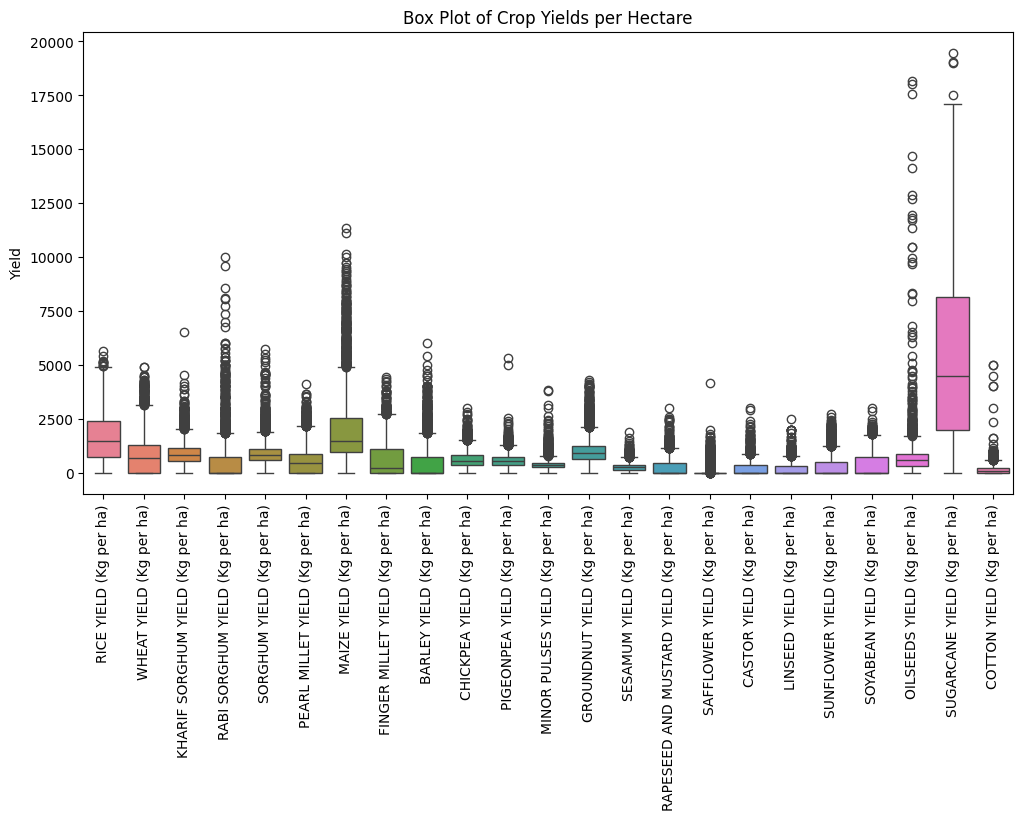

In [6]:
plt.figure(figsize=(12,6))
sns.boxplot(data=ICRISAT_df[yield_columns])
plt.xticks(rotation=90)
plt.title("Box Plot of Crop Yields per Hectare")
plt.ylabel("Yield")
plt.show();

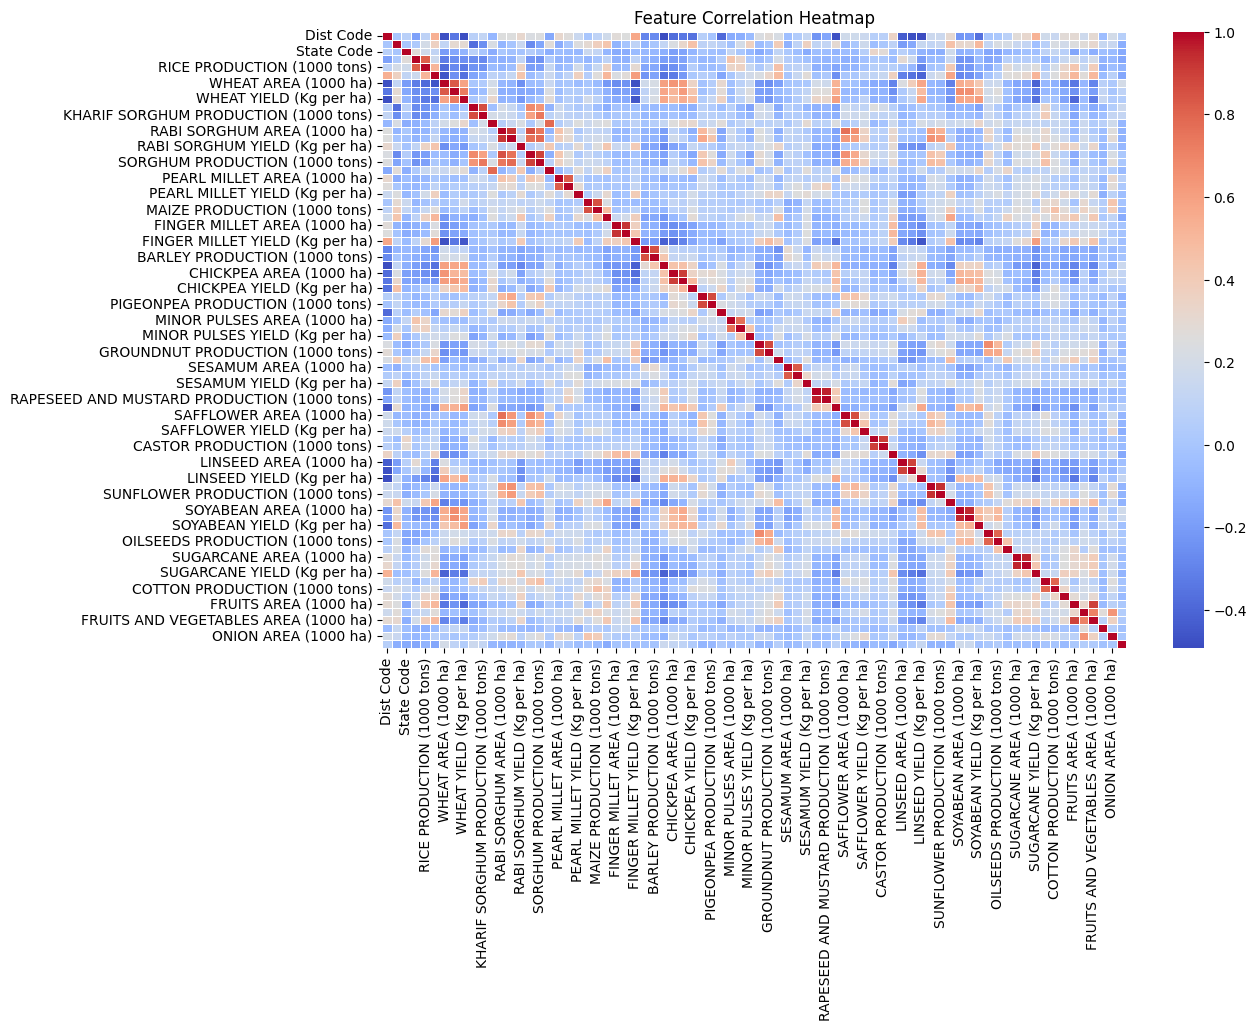

In [7]:
plt.figure(figsize=(12,8))
corr_matrix = ICRISAT_df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr_matrix, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show();

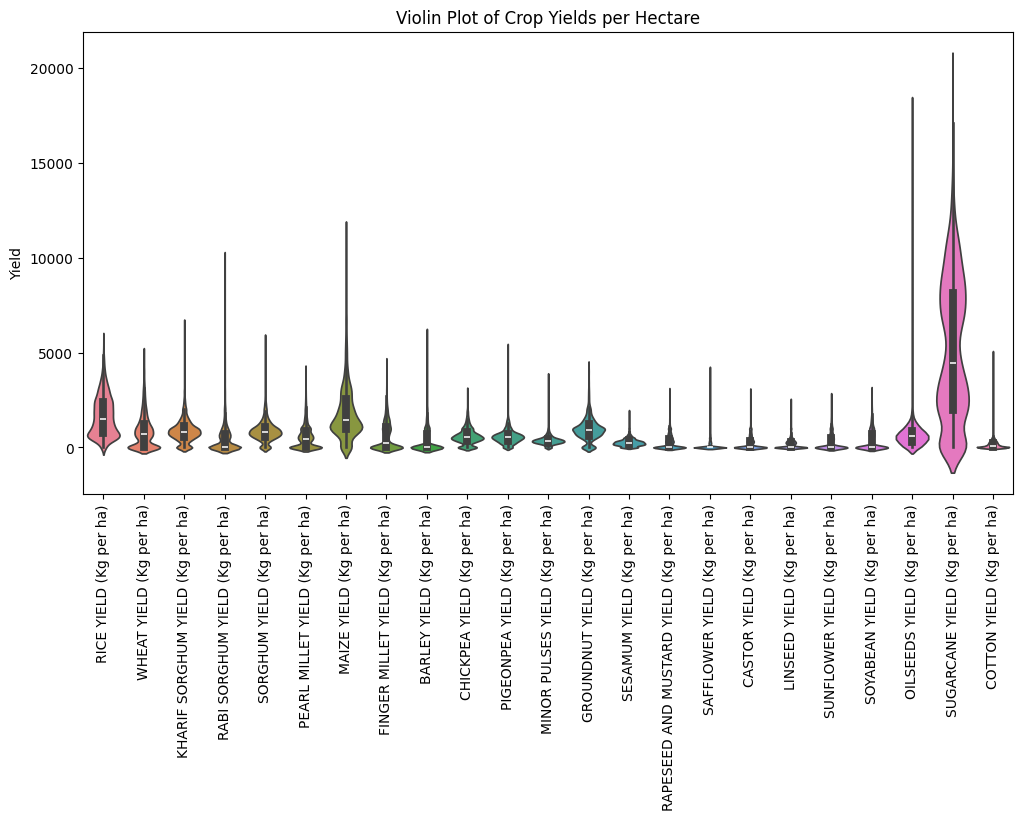

In [8]:
plt.figure(figsize=(12,6))
sns.violinplot(data=ICRISAT_df[yield_columns])
plt.xticks(rotation=90)
plt.title("Violin Plot of Crop Yields per Hectare")
plt.ylabel("Yield")
plt.show();

In [9]:
for target in yield_columns:
    print(f"Training {target}...")

    data = ICRISAT_df.dropna(subset=[target])
    X, y = data.select_dtypes(include=[np.number]).drop(columns=[target], errors='ignore'), data[target]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    model = RandomForestRegressor(n_estimators=100, random_state=42).fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)*100

    print(f" Accurates {round(r2,2)} during Test")
    results = pd.concat([results, pd.DataFrame({"Target": [target], "Accuracy (%)": [r2]})], ignore_index=True)

Training RICE YIELD (Kg per ha)...
 Accurates 92.44 during Test
Training WHEAT YIELD (Kg per ha)...


C:\Users\Samuel Raj\AppData\Local\Temp\ipykernel_27104\1588037411.py:13: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results = pd.concat([results, pd.DataFrame({"Target": [target], "Accuracy (%)": [r2]})], ignore_index=True)


 Accurates 93.36 during Test
Training KHARIF SORGHUM YIELD (Kg per ha)...
 Accurates 89.84 during Test
Training RABI SORGHUM YIELD (Kg per ha)...
 Accurates 78.97 during Test
Training SORGHUM YIELD (Kg per ha)...
 Accurates 86.57 during Test
Training PEARL MILLET YIELD (Kg per ha)...
 Accurates 85.87 during Test
Training MAIZE YIELD (Kg per ha)...
 Accurates 84.19 during Test
Training FINGER MILLET YIELD (Kg per ha)...
 Accurates 90.14 during Test
Training BARLEY YIELD (Kg per ha)...
 Accurates 88.22 during Test
Training CHICKPEA YIELD (Kg per ha)...
 Accurates 84.48 during Test
Training PIGEONPEA YIELD (Kg per ha)...
 Accurates 86.1 during Test
Training MINOR PULSES YIELD (Kg per ha)...
 Accurates 72.74 during Test
Training GROUNDNUT YIELD (Kg per ha)...
 Accurates 83.66 during Test
Training SESAMUM YIELD (Kg per ha)...
 Accurates 76.39 during Test
Training RAPESEED AND MUSTARD YIELD (Kg per ha)...
 Accurates 83.92 during Test
Training SAFFLOWER YIELD (Kg per ha)...
 Accurates 74.78 d

In [ ]:
results.to_csv("Predicting Crops production per hectare.csv")
results

Target  Accuracy (%)
0                   RICE YIELD (Kg per ha)     92.441801
1                  WHEAT YIELD (Kg per ha)     93.359999
2         KHARIF SORGHUM YIELD (Kg per ha)     89.842870
3           RABI SORGHUM YIELD (Kg per ha)     78.971374
4                SORGHUM YIELD (Kg per ha)     86.566690
5           PEARL MILLET YIELD (Kg per ha)     85.872266
6                  MAIZE YIELD (Kg per ha)     84.190402
7          FINGER MILLET YIELD (Kg per ha)     90.139463
8                 BARLEY YIELD (Kg per ha)     88.220569
9               CHICKPEA YIELD (Kg per ha)     84.478788
10             PIGEONPEA YIELD (Kg per ha)     86.096918
11          MINOR PULSES YIELD (Kg per ha)     72.736471
12             GROUNDNUT YIELD (Kg per ha)     83.663363
13               SESAMUM YIELD (Kg per ha)     76.390272
14  RAPESEED AND MUSTARD YIELD (Kg per ha)     83.918139
15             SAFFLOWER YIELD (Kg per ha)     74.777480
16                CASTOR YIELD (Kg per ha)     89.955265
17               LINSEED YIELD (Kg per ha)     89.538343
18             SUNFLOWER YIELD (Kg per ha)     89.422078
19              SOYABEAN YIELD (Kg per ha)     91.236736
20              OILSEEDS YIELD (Kg per ha)     85.088852
21             SUGARCANE YIELD (Kg per ha)     90.039283
22                COTTON YIELD (Kg per ha)     82.094320